**Imports**

In [1]:
import itertools as it
import numpy as np
import matplotlib.pyplot as plt #For saving
import pydataset
import pyplotterlib.standard.plotters as ppl

**1) Extract data**

In [2]:
RAW_DF = pydataset.data("Earnings")

print("Group Labels = {}".format(RAW_DF["age"].unique()) )
print("Mean Earnings = {}".format(RAW_DF["y"].mean()) )
print("Minimum Earnings = {}".format(RAW_DF["y"].min()) )
print("Maximum Earnings = {}".format(RAW_DF["y"].max()) )

_g1Earnings = RAW_DF.loc[ RAW_DF["age"]=="g1" ].y.to_numpy()
_g2Earnings = RAW_DF.loc[ RAW_DF["age"]=="g2" ].y.to_numpy()
_g3Earnings = RAW_DF.loc[ RAW_DF["age"]=="g3" ].y.to_numpy()

print("The first three group-1 earnings values are {:.2f}, {:.2f}, {:.2f}".format(*_g1Earnings[:3]))

Group Labels = ['g3' 'g2' 'g1']
Mean Earnings = 25511.482653539617
Minimum Earnings = 332.5
Maximum Earnings = 83810.5
The first three group-1 earnings values are 332.50, 857.50, 1208.00


**2) Create a quick and rough histogram of the data**

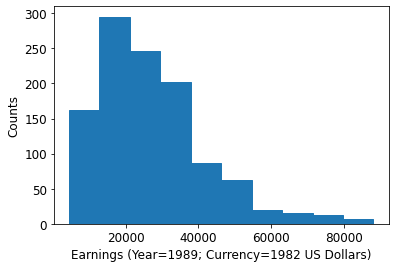

In [3]:
_currKwargs = {"plotDataHisto": [ np.histogram(_g1Earnings) ], "fontSizeDefault":12,
               "xLabelStr":"Earnings (Year=1989; Currency=1982 US Dollars)",
               "yLabelStr":"Counts"
              }
unused = ppl.HistogramPlotter(**_currKwargs).createPlot()

**3) Bin the data + convert into probability densities**

In [4]:
def getBinnedProbabilityDensities(inpEarnings, inpBins, pDenFactor=1e3):
    counts, edges = np.histogram(inpEarnings, bins=inpBins)
    totalCounts = np.sum(counts)
    
    binRange = abs(np.min(edges) - np.max(edges))
    binWidths = [ abs(edges[idx+1]-edges[idx]) for idx,unused in enumerate(edges[:-1]) ]
    pDensities = [ (count/totalCounts)*(width/binRange)*pDenFactor for
                  count,width in it.zip_longest(counts,binWidths) ]

    return pDensities, edges
    
    
_allBins = np.linspace(0,85000,num=50)

pDensityG1 = getBinnedProbabilityDensities(_g1Earnings, _allBins)
pDensityG2 = getBinnedProbabilityDensities(_g2Earnings, _allBins)
pDensityG3 = getBinnedProbabilityDensities(_g3Earnings, _allBins)


**4) Create a histogram plotter for each estimated probability distribution**

In [5]:
_currKwargs = {"fontSizeDefault":12, "gridLinesShowY":True,
               "xLabelStr":"Earnings (Year=1989; Currency=1982 US Dollars)",
               "yLabelStr":"Probability Density x 1e3"}
templPlotter = ppl.HistogramPlotter(**_currKwargs)

g1Plotter = templPlotter.createFactory(plotDataHisto=[pDensityG1], titleStr="Group 1")
g2Plotter = templPlotter.createFactory(plotDataHisto=[pDensityG2], titleStr="Group 2")
g3Plotter = templPlotter.createFactory(plotDataHisto=[pDensityG3], titleStr="Group 3")



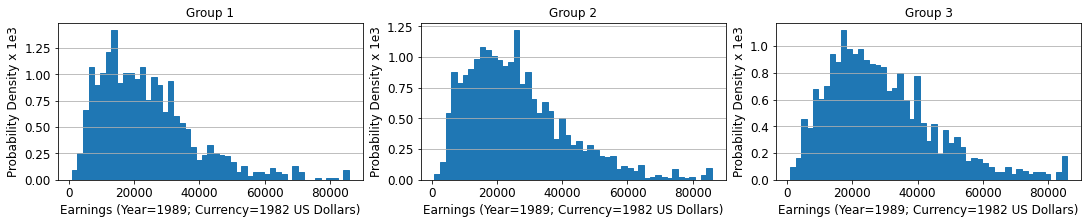

In [6]:
_currKwargs = {"constrainedLayout":True,
               "figHeightPerRow":3, "figWidthPerCol":5, "nColsGrid":3,
               "plotters":[g1Plotter,g2Plotter,g3Plotter]}
currMultiPlotter = ppl.RectMultiPlotter(**_currKwargs)
_unused = currMultiPlotter.createPlot()
plt.savefig("histogram_a_imgA")

**5) Create plots with pairwise comparisons of distributions**

In [7]:
#Pairwise comparisons
g1g2Plotter = templPlotter.createFactory(plotDataHisto=[pDensityG1, pDensityG2], titleStr="Group 1 vs 2",
                                         dataLabels=["Group 1" ,"Group 2"], showLegend=True, barColors=['r','g'])
g1g3Plotter = templPlotter.createFactory(plotDataHisto=[pDensityG1, pDensityG3], titleStr="Group 1 vs 3",
                                         dataLabels=["Group 1", "Group 3"], showLegend=True, barColors=['r','g'])
g2g3Plotter = templPlotter.createFactory(plotDataHisto=[pDensityG2, pDensityG3], titleStr="Group 2 vs 3",
                                         dataLabels=["Group 2", "Group 3"], showLegend=True, barColors=['r','g'])

#Swap the orders
g2g1Plotter = g1g2Plotter.createFactory(plotInRevOrder=True)
g3g1Plotter = g1g3Plotter.createFactory(plotInRevOrder=True)
g3g2Plotter = g2g3Plotter.createFactory(plotInRevOrder=True)



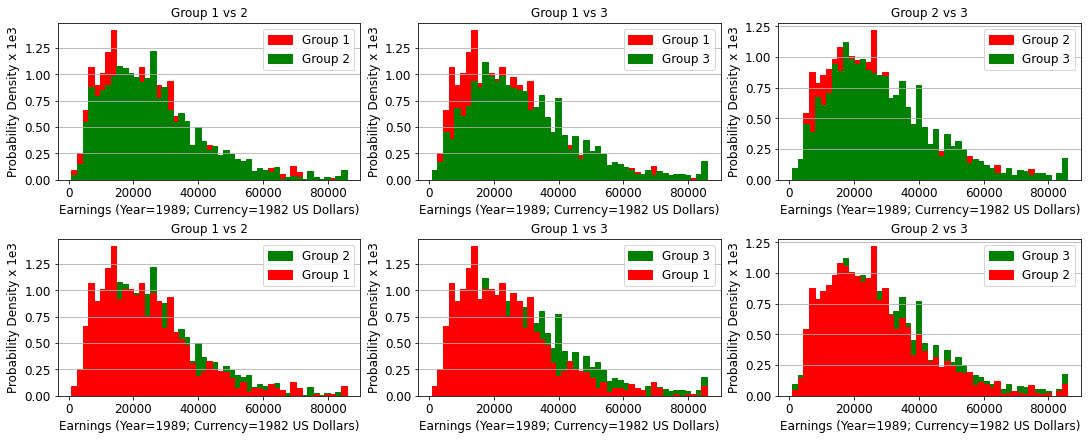

In [8]:
_currPlot = currMultiPlotter.createPlot(plotters=[g1g2Plotter, g1g3Plotter, g2g3Plotter,
                                                  g2g1Plotter, g3g1Plotter, g3g2Plotter])
plt.savefig("histogram_a_imgB")